# Analysis of a Telegraph Noise Measurement

Here we are analyzing a quantum point contact measurement. We will extract 
tunneling rate and check for stationarity.

In [1]:
import signalsnap as sp
import matplotlib.pyplot as plt
import numpy as np

Number of data points: 6178899
chunk shape:  20000
Maximum frequency: 5000.0
801
Number of points: 801

Number of data points: 6178899
chunk shape:  20000
Maximum frequency: 5000.0
1601
Number of points: 800

Number of data points: 6178899
chunk shape:  20000
Maximum frequency: 5000.0
801
Number of points: 801



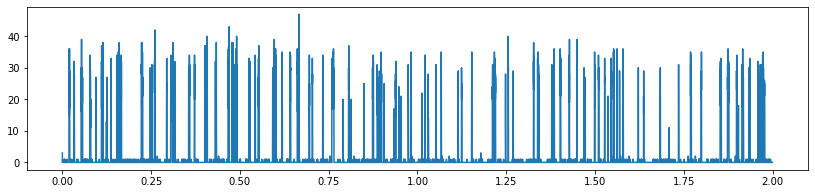

In [2]:
path = 'example_data/long_measurement.h5'
group_key = 'day1'
data_set = 'measurement1'
spec = sp.FitTelegraph(path, group_key, data_set)
f_max = 0.4e3
m = 10
window_size = 20e3


f2, s2, s2err = spec.calc_spec(2, backend='opencl', window_size=window_size, f_max=f_max, m=m, window_shift=1)
f3, s3, s3err = spec.calc_spec(3, backend='opencl', window_size=window_size, f_max=f_max*2, m=m, window_shift=1)
f4, s4, s4err = spec.calc_spec(4, backend='opencl', window_size=window_size, f_max=f_max, m=m, window_shift=1)


Let's see what the polyspectra look like.

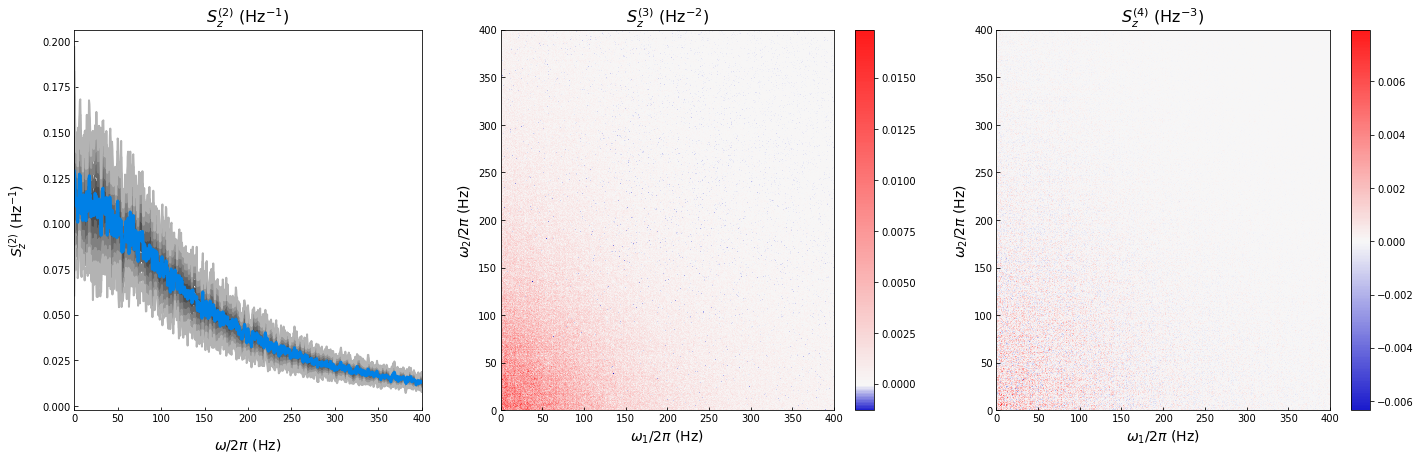

In [3]:
fig = spec.poly_plot(arcsinh_plot=False, sigma=5, f_max=0.4e3, green_alpha=0.0, arcsinh_const=1e-4, contours=False)


We can check if something change in the powerspectra during the measurements.

One spectrum calculated from a 6.666666666666667 min measurement


/Users/markus/opt/anaconda3/lib/python3.7/site-packages/QuantumPolyspectra/analysis.py:236: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(x, y, s2_array, cmap='rainbow', vmin=vmin, vmax=vmax)  # norm=norm)


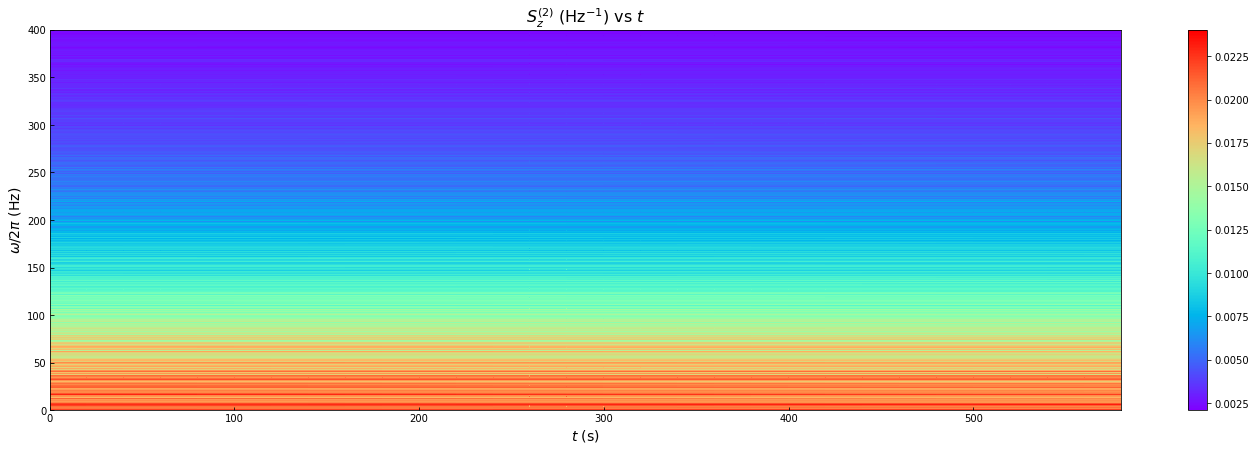

In [4]:
spec.stationarity_plot(arcsinh_plot=False, arcsinh_const=1e-2, s2_filter=20, contours=False, f_max=0.4e3, normalize=None)


Now we can fit the tunneling rates. We just have to specify initial 
values for the tunneling parameters.

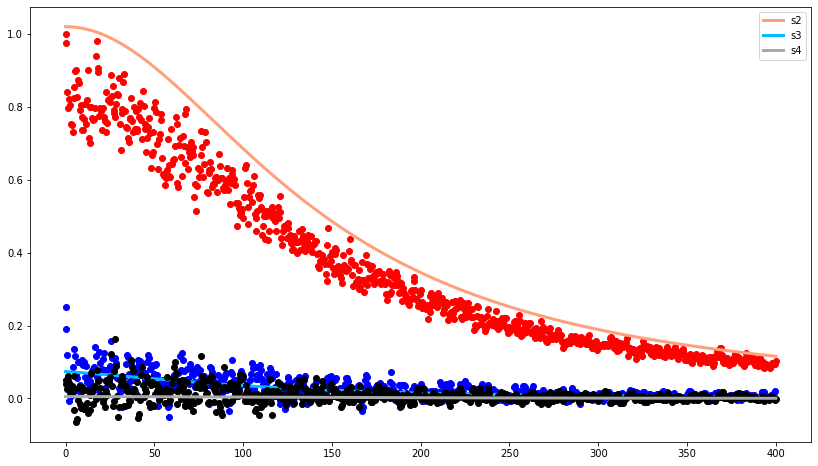

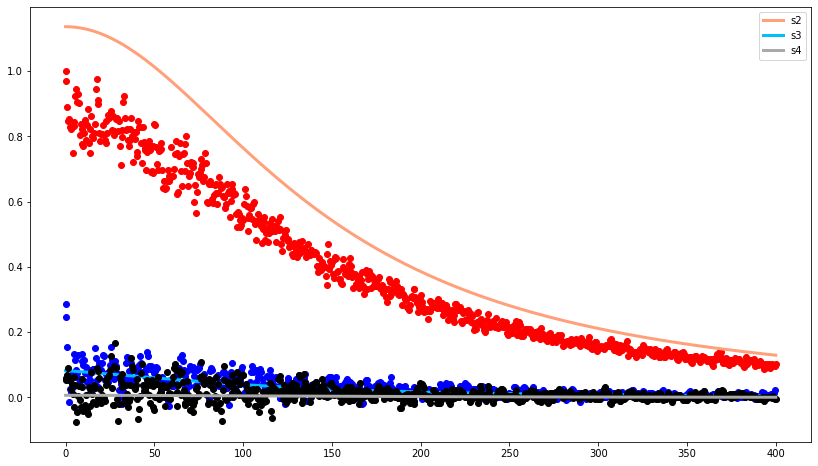

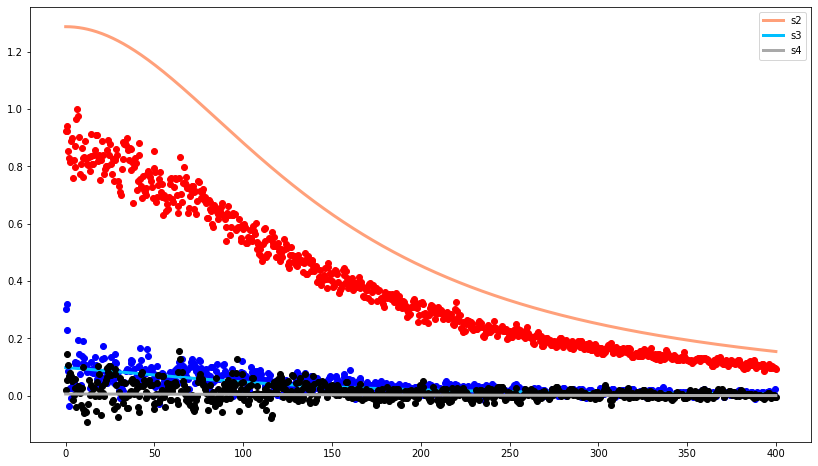

In [5]:
starting_gammas = [[1000, 500]]
betas, gamma_ins, gamma_ins_err, gamma_outs, gamma_outs_err = spec.fit_stationarity_plot(starting_gammas=starting_gammas, with_s4=True, filter=10, plot=True)




Afterwands we can check for the stability of the tunneling rates.

In [6]:
def plot_fit(self, gamma_ins, gamma_ins_err, gamma_outs, gamma_outs_err, filter=10, ylim=False):

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 7))
    plt.rc('text', usetex=False)
    plt.rc('font', size=10)
    plt.rcParams["axes.axisbelow"] = False

    t_for_one_spec = self.delta_t * self.m * self.window_size
    time_axis = np.arange(0, self.S_sigmas[2].shape[1] * t_for_one_spec, t_for_one_spec)[::filter]
    
    ax2 = ax.twinx()
    l1 = ax.errorbar(time_axis, gamma_ins, yerr=gamma_ins_err, color='blue', label=r'$\gamma_{in}$')
    l2 = ax2.errorbar(time_axis, gamma_outs, yerr=gamma_outs_err, color='orange', label=r'$\gamma_{out}$')
    ax.set_xlabel(r"$t$ (s)", fontdict={'fontsize': 14})
    ax.set_ylabel(r"$\gamma_{in}$ (Hz)", fontdict={'fontsize': 14})
    ax2.set_ylabel(r"$\gamma_{out}$ (Hz)", fontdict={'fontsize': 14})
    ax.tick_params(axis='both', direction='in')
    ax.set_title(r'10 T @ 0.389V: $\gamma$ vs $t$',
             fontdict={'fontsize': 16})
    
    plt.xlim([0, np.max(time_axis)])
    if ylim:
        plt.ylim([0, ylim])
        
    plt.legend([l1, l2], [r'$\gamma_{in}$', r'$\gamma_{out}$'])


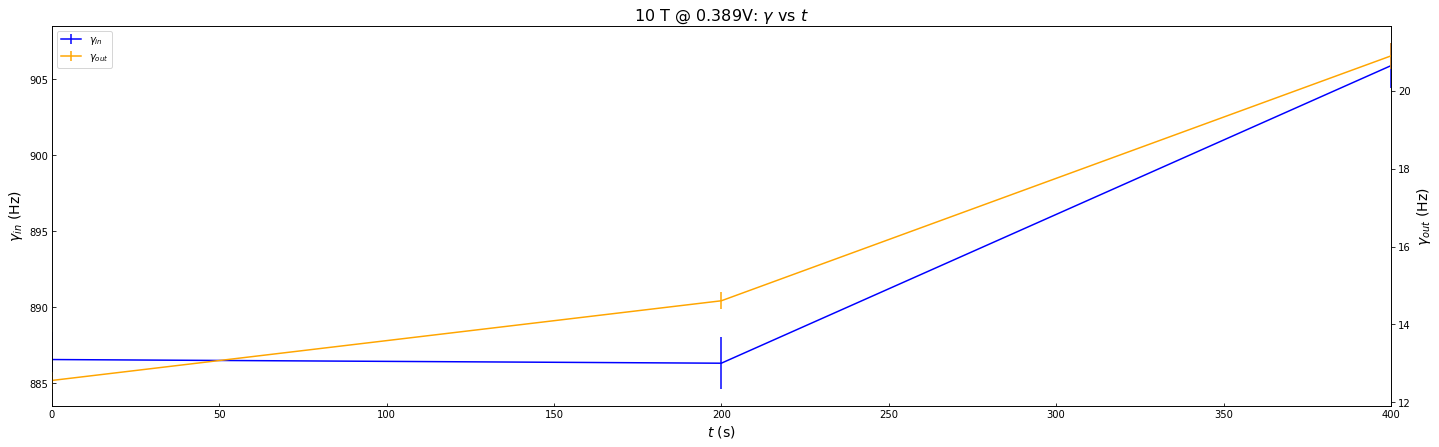

In [7]:
plot_fit(spec, gamma_ins, gamma_ins_err, gamma_outs, gamma_outs_err, filter=10)